### This analysis is of real world air quality data of Canada using Python and SQL, focusing on key pollutants such as NO₂, PM2.5, SO₂, O₃, NO, and CO. SQL is utilized for data extraction, cleaning, and aggregation, while Python is employed for statistical analysis and visualization. The analysis explores pollutant trends, peak pollution events, and compliance with air quality standards, providing insights into temporal patterns and potential pollution sources. 
### Dataset source : https://open.canada.ca/data/en/dataset/e5018406-cb90-4ded-a826-3e756402a2db

In [2]:
# 1. Importing required libraries
import pandas as pd
import numpy as np
%load_ext sql
import pyodbc
import  matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from scipy.signal import find_peaks
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [9]:
# Loading SQL driver in python
conn = pyodbc.connect(r"DRIVER={ODBC Driver 17 for SQL Server};" r"SERVER=PARIKSHITA-COMP\SQLEXPRESS;" r"DATABASE=PortfolioProjects;" r"Trusted_Connection=yes;")
cursor = conn.cursor()

In [2]:
# 2. Loading the SQL query in Python and converting dataset into a DataFrame

cursor.execute("SELECT [year], AVG(mean) avg_concentration, MAX(mean) max_concentration, MIN(mean) min_concentration FROM PortfolioProjects..co_data GROUP BY [year] ORDER BY [year] DESC")
query1 = cursor.fetchall()
co_stats = pd.DataFrame.from_records(query1, columns = ['year','CO_avg_conc','CO_max_conc','CO_min_conc'])
co_stats['year']=co_stats['year'].astype(int)

cursor.execute("SELECT [year], AVG(mean) avg_concentration, MAX(mean) max_concentration, MIN(mean) min_concentration FROM PortfolioProjects..no_data GROUP BY [year] ORDER BY [year] DESC")
query2 = cursor.fetchall()
no_stats = pd.DataFrame.from_records(query2, columns = ['year','NO_avg_conc','NO_max_conc','NO_min_conc'])
no_stats['year']=no_stats['year'].astype(int)

cursor.execute("SELECT [year], AVG(mean) avg_concentration, MAX(mean) max_concentration, MIN(mean) min_concentration FROM PortfolioProjects..no2_data GROUP BY [year] ORDER BY [year] DESC")
query3 = cursor.fetchall()
no2_stats = pd.DataFrame.from_records(query3, columns = ['year','NO2_avg_conc','NO2_max_conc','NO2_min_conc'])
no2_stats['year']=no2_stats['year'].astype(int)

cursor.execute("SELECT [year], AVG(mean) avg_concentration, MAX(mean) max_concentration, MIN(mean) min_concentration FROM PortfolioProjects..o3_data GROUP BY [year] ORDER BY [year] DESC")
query4 = cursor.fetchall()
o3_stats = pd.DataFrame.from_records(query4, columns = ['year','O3_avg_conc','O3_max_conc','O3_min_conc'])
o3_stats['year']=o3_stats['year'].astype(int)

cursor.execute("SELECT [year], AVG(mean) avg_concentration, MAX(mean) max_concentration, MIN(mean) min_concentration FROM PortfolioProjects..so2_data GROUP BY [year] ORDER BY [year] DESC")
query5 = cursor.fetchall()
so2_stats = pd.DataFrame.from_records(query5, columns = ['year','SO2_avg_conc','SO2_max_conc','SO2_min_conc'])
so2_stats['year']=so2_stats['year'].astype(int)

cursor.execute("SELECT [year], AVG(mean) avg_concentration, MAX(mean) max_concentration, MIN(mean) min_concentration FROM PortfolioProjects..pm25_data GROUP BY [year] ORDER BY [year] DESC")
query6 = cursor.fetchall()
pm25_stats = pd.DataFrame.from_records(query6, columns = ['year','PM25_avg_conc','PM25_max_conc','PM25_min_conc'])
pm25_stats['year']=pm25_stats['year'].astype(int)


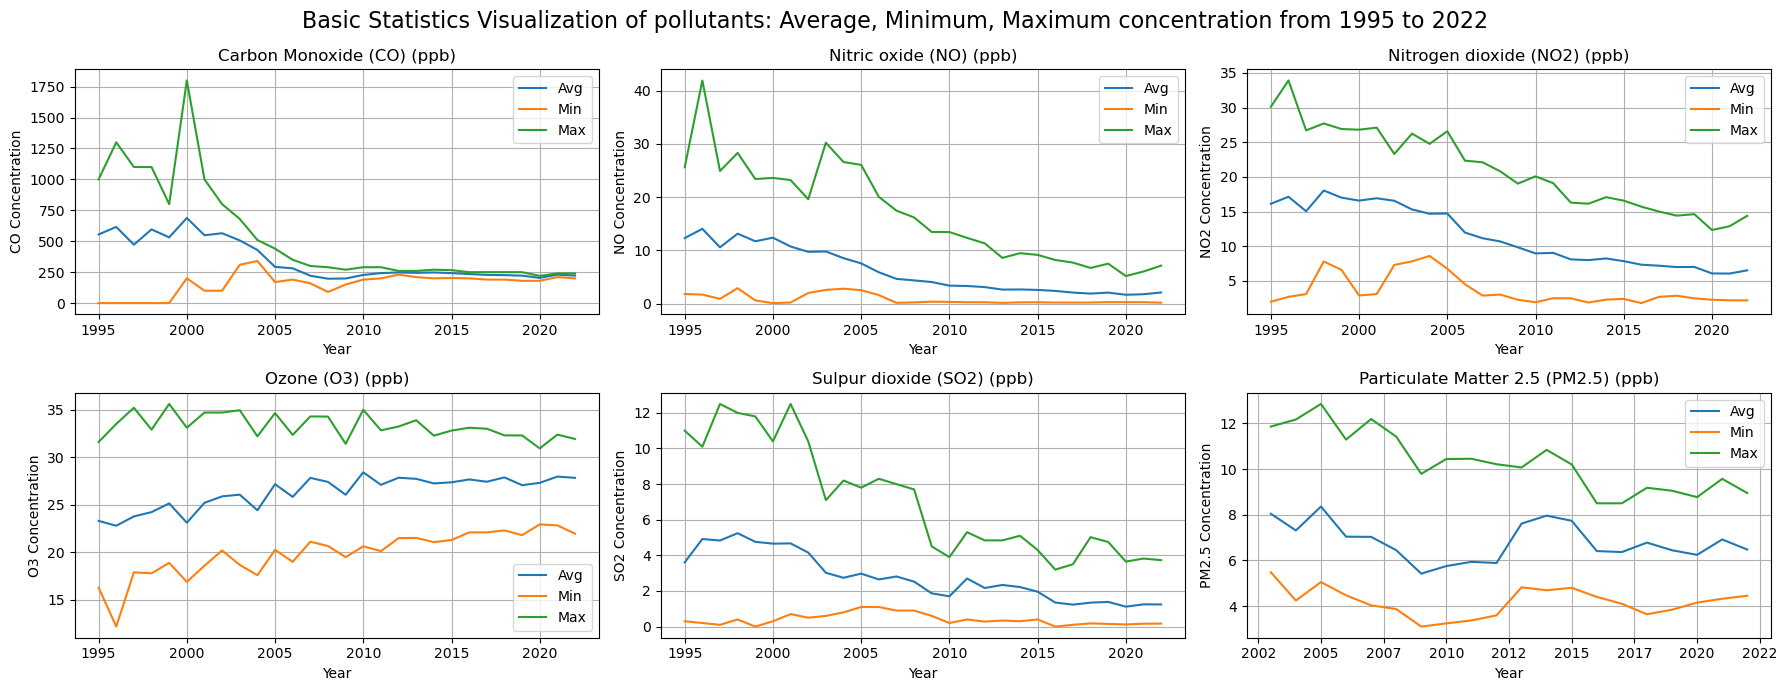

In [3]:
# 3. Basic statistics visualisation of all the pollutants concentration

fig,axs = plt.subplots(2,3,figsize=(18,7))

axs[0,0].plot(co_stats['year'],co_stats['CO_avg_conc']*1000, label = 'Avg')
axs[0,0].plot(co_stats['year'],co_stats['CO_min_conc']*1000, label = 'Min')
axs[0,0].plot(co_stats['year'],co_stats['CO_max_conc']*1000, label = 'Max')
axs[0,0].set_title('Carbon Monoxide (CO) (ppb)')
axs[0,0].set_ylabel('CO Concentration')
axs[0,0].set_xlabel('Year')
axs[0,0].grid(True)
axs[0,0].legend()

axs[0,1].plot(no_stats['year'],no_stats['NO_avg_conc'], label = 'Avg')
axs[0,1].plot(no_stats['year'],no_stats['NO_min_conc'], label = 'Min')
axs[0,1].plot(no_stats['year'],no_stats['NO_max_conc'], label = 'Max')
axs[0,1].set_title('Nitric oxide (NO) (ppb)')
axs[0,1].set_ylabel('NO Concentration')
axs[0,1].set_xlabel('Year')
axs[0,1].grid(True)
axs[0,1].legend()

axs[0,2].plot(no2_stats['year'],no2_stats['NO2_avg_conc'], label = 'Avg')
axs[0,2].plot(no2_stats['year'],no2_stats['NO2_min_conc'], label = 'Min')
axs[0,2].plot(no2_stats['year'],no2_stats['NO2_max_conc'], label = 'Max')
axs[0,2].set_title('Nitrogen dioxide (NO2) (ppb)')
axs[0,2].set_ylabel('NO2 Concentration')
axs[0,2].set_xlabel('Year')
axs[0,2].grid(True)
axs[0,2].legend()

axs[1,0].plot(o3_stats['year'],o3_stats['O3_avg_conc'], label = 'Avg')
axs[1,0].plot(o3_stats['year'],o3_stats['O3_min_conc'], label = 'Min')
axs[1,0].plot(o3_stats['year'],o3_stats['O3_max_conc'], label = 'Max')
axs[1,0].set_title('Ozone (O3) (ppb)')
axs[1,0].set_ylabel('O3 Concentration')
axs[1,0].set_xlabel('Year')
axs[1,0].grid(True)
axs[0,0].legend()

axs[1,1].plot(so2_stats['year'],so2_stats['SO2_avg_conc'], label = 'Avg')
axs[1,1].plot(so2_stats['year'],so2_stats['SO2_min_conc'], label = 'Min')
axs[1,1].plot(so2_stats['year'],so2_stats['SO2_max_conc'], label = 'Max')
axs[1,1].set_title('Sulpur dioxide (SO2) (ppb)')
axs[1,1].set_ylabel('SO2 Concentration')
axs[1,1].set_xlabel('Year')
axs[1,1].grid(True)
axs[1,0].legend()

axs[1,2].plot(pm25_stats['year'],pm25_stats['PM25_avg_conc'], label = 'Avg')
axs[1,2].plot(pm25_stats['year'],pm25_stats['PM25_min_conc'], label = 'Min')
axs[1,2].plot(pm25_stats['year'],pm25_stats['PM25_max_conc'], label = 'Max')
axs[1,2].set_title('Particulate Matter 2.5 (PM2.5) (ppb)')
axs[1,2].set_ylabel('PM2.5 Concentration')
axs[1,2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
axs[1,2].set_xlabel('Year')
axs[1,2].grid(True)
axs[1,2].legend()

plt.suptitle('Basic Statistics Visualization of pollutants: Average, Minimum, Maximum concentration from 1995 to 2022', fontsize=16)
plt.tight_layout()  
plt.show()

### All pollutants seem to decrease after 2000s, although Ozone concetration reman fairly consistent with minor fluctuations

In [4]:
# Loading the SQL query in Python and converting dataset into a DataFrame

cursor.execute("SELECT [Year], AVG([10th Percentile]) AS P10, AVG([30th Percentile]) AS P30, AVG([50th Percentile]) AS P50, AVG([70th Percentile]) AS P70, AVG([90th Percentile]) AS P90, AVG([99 Percentile]) AS P99 FROM PortfolioProjects..co_data GROUP BY [Year] ORDER BY [Year] DESC")
query7 = cursor.fetchall()
co_IQR = pd.DataFrame.from_records(query7, columns = ['year','P10','P30','P50','P70','P90','P99'])
co_IQR['year']=co_IQR['year'].astype(int)

cursor.execute("SELECT [Year], AVG([10th Percentile]) AS P10, AVG([30th Percentile]) AS P30, AVG([50th Percentile]) AS P50, AVG([70th Percentile]) AS P70, AVG([90th Percentile]) AS P90, AVG([99 Percentile]) AS P99 FROM PortfolioProjects..no_data GROUP BY [Year] ORDER BY [Year] DESC")
query8 = cursor.fetchall()
no_IQR = pd.DataFrame.from_records(query8, columns = ['year','P10','P30','P50','P70','P90','P99'])
no_IQR['year']=no_IQR['year'].astype(int)

cursor.execute("SELECT [Year], AVG([10th Percentile]) AS P10, AVG([30th Percentile]) AS P30, AVG([50th Percentile]) AS P50, AVG([70th Percentile]) AS P70, AVG([90th Percentile]) AS P90, AVG([99 Percentile]) AS P99 FROM PortfolioProjects..no2_data GROUP BY [Year] ORDER BY [Year] DESC")
query9 = cursor.fetchall()
no2_IQR = pd.DataFrame.from_records(query9, columns = ['year','P10','P30','P50','P70','P90','P99'])
no2_IQR['year']=no2_IQR['year'].astype(int)

cursor.execute("SELECT [Year], AVG([10th Percentile]) AS P10, AVG([30th Percentile]) AS P30, AVG([50th Percentile]) AS P50, AVG([70th Percentile]) AS P70, AVG([90th Percentile]) AS P90, AVG([99 Percentile]) AS P99 FROM PortfolioProjects..o3_data GROUP BY [Year] ORDER BY [Year] DESC")
query10 = cursor.fetchall()
o3_IQR = pd.DataFrame.from_records(query10, columns = ['year','P10','P30','P50','P70','P90','P99'])
o3_IQR['year']=o3_IQR['year'].astype(int)

cursor.execute("SELECT [Year], AVG([10th Percentile]) AS P10, AVG([30th Percentile]) AS P30, AVG([50th Percentile]) AS P50, AVG([70th Percentile]) AS P70, AVG([90th Percentile]) AS P90, AVG([99 Percentile]) AS P99 FROM PortfolioProjects..so2_data GROUP BY [Year] ORDER BY [Year] DESC")
query11 = cursor.fetchall()
so2_IQR = pd.DataFrame.from_records(query11, columns = ['year','P10','P30','P50','P70','P90','P99'])
so2_IQR['year']=so2_IQR['year'].astype(int)

cursor.execute("SELECT [Year], AVG([10th Percentile]) AS P10, AVG([30th Percentile]) AS P30, AVG([50th Percentile]) AS P50, AVG([70th Percentile]) AS P70, AVG([90th Percentile]) AS P90, AVG([99 Percentile]) AS P99 FROM PortfolioProjects..pm25_data GROUP BY [Year] ORDER BY [Year] DESC")
query12 = cursor.fetchall()
pm25_IQR = pd.DataFrame.from_records(query12, columns = ['year','P10','P30','P50','P70','P90','P99'])
pm25_IQR['year']=pm25_IQR['year'].astype(int)


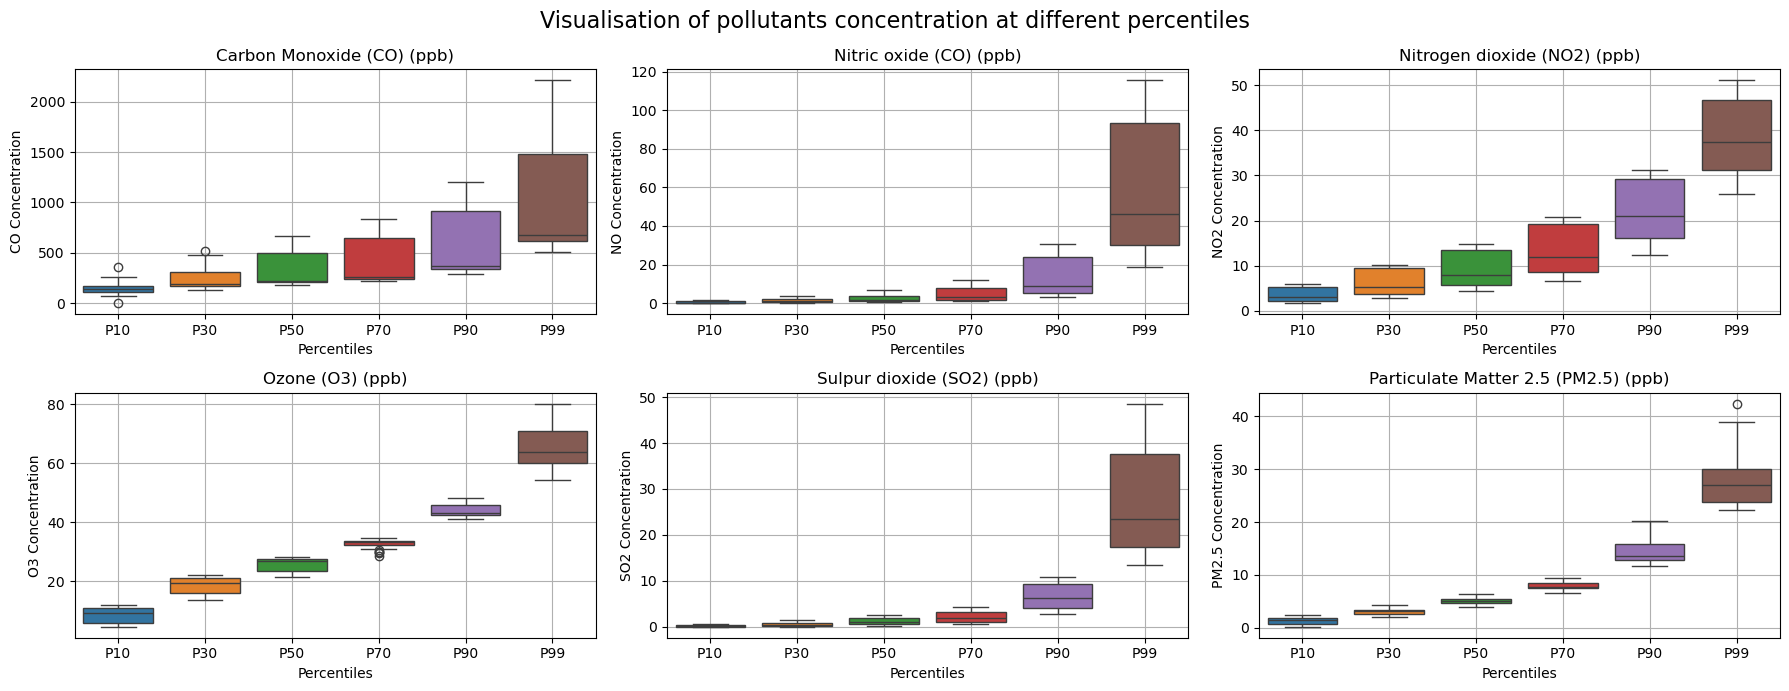

In [5]:
fig,axs = plt.subplots(2,3,figsize=(18,7))

sns.boxplot(data = co_IQR[['P10','P30','P50','P70','P90','P99']]*1000,ax=axs[0,0],label = 'CO')
axs[0,0].set_title('Carbon Monoxide (CO) (ppb)')
axs[0,0].set_ylabel('CO Concentration')
axs[0,0].set_xlabel('Percentiles')
axs[0,0].grid(True)
#axs[0,0].legend()

sns.boxplot(data = no_IQR[['P10','P30','P50','P70','P90','P99']],ax=axs[0,1],label = 'NO')
axs[0,1].set_title('Nitric oxide (CO) (ppb)')
axs[0,1].set_ylabel('NO Concentration')
axs[0,1].set_xlabel('Percentiles')
axs[0,1].grid(True)
#axs[0,1].legend()

sns.boxplot(data = no2_IQR[['P10','P30','P50','P70','P90','P99']],ax=axs[0,2],label = 'NO2')
axs[0,2].set_title('Nitrogen dioxide (NO2) (ppb)')
axs[0,2].set_ylabel('NO2 Concentration')
axs[0,2].set_xlabel('Percentiles')
axs[0,2].grid(True)
#axs[0,2].legend()

sns.boxplot(data = o3_IQR[['P10','P30','P50','P70','P90','P99']],ax=axs[1,0],label = 'O3')
axs[1,0].set_title('Ozone (O3) (ppb)')
axs[1,0].set_ylabel('O3 Concentration')
axs[1,0].set_xlabel('Percentiles')
axs[1,0].grid(True)
#axs[0,0].legend()

sns.boxplot(data = so2_IQR[['P10','P30','P50','P70','P90','P99']],ax=axs[1,1],label = 'SO2')
axs[1,1].set_title('Sulpur dioxide (SO2) (ppb)')
axs[1,1].set_ylabel('SO2 Concentration')
axs[1,1].set_xlabel('Percentiles')
axs[1,1].grid(True)
#axs[1,0].legend()

sns.boxplot(data = pm25_IQR[['P10','P30','P50','P70','P90','P99']],ax=axs[1,2],label = 'PM25')
axs[1,2].set_title('Particulate Matter 2.5 (PM2.5) (ppb)')
axs[1,2].set_ylabel('PM2.5 Concentration')
#axs[1,2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
axs[1,2].set_xlabel('Percentiles')
axs[1,2].grid(True)
#axs[1,2].legend()

plt.suptitle('Visualisation of pollutants concentration at different percentiles', fontsize=16)
plt.tight_layout()  
plt.show()


### Higher percentiles consistently show spikes across pollutants, indicating episodic pollution events. Traffic-related pollutants (CO, NO, NO₂) show more pronounced percentile shifts, suggesting localized sources. O₃ patterns might reflect seasonal trends rather than daily or hourly changes.

In [9]:
# Loading the SQL query in Python and converting dataset into a DataFrame
cursor.execute("""WITH cte ([Year],SN,City,co_mean,NO_Mean,NO2_Mean,O3_Mean,pm_Mean,SO2_Mean) AS (
SELECT  co.[year] [Year],co.[station number] SN,co.city City, co.mean*1000 co_mean, no_.mean NO_Mean, 
		no2.Mean NO2_Mean, o3.Mean O3_Mean, pm.Mean pm_Mean, so2.Mean SO2_Mean	
FROM PortfolioProjects..co_data co
LEFT JOIN PortfolioProjects..no_data no_ ON co.[year] = no_.[year] AND co.city = no_.city
LEFT JOIN PortfolioProjects..no2_data no2 ON co.[year] = no2.[year] AND co.city = no2.city
LEFT JOIN PortfolioProjects..o3_data o3 ON co.[year] = o3.[year] AND co.city = o3.city
LEFT JOIN PortfolioProjects..PM25_data pm ON co.[year] = pm.[year] AND co.city = pm.city
LEFT JOIN PortfolioProjects..so2_data so2 ON co.[year] = so2.[year] AND co.city = so2.city ) SELECT [year], AVG(co_mean) CO_Mean_avg, AVG(NO_Mean) NO_Mean_avg, 
AVG(NO2_Mean) NO2_Mean_avg, AVG(O3_Mean) O3_Mean_avg, AVG(pm_Mean) pm_Mean_avg, AVG(SO2_Mean) SO2_Mean_avg	
FROM cte GROUP BY [year]
ORDER BY [year] DESC""" )

query13 = cursor.fetchall()
trend_analysis= pd.DataFrame.from_records(query13, columns = ['year','CO','NO','NO2','O3','PM2.5','SO2'])
trend_analysis['year']=trend_analysis['year'].astype(int)


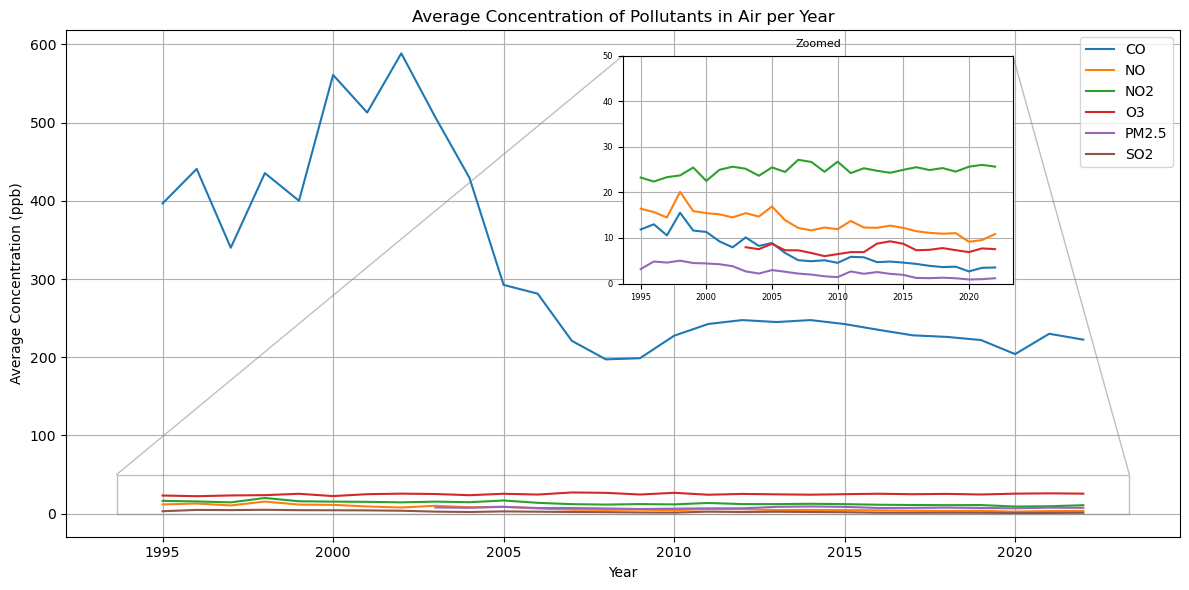

In [134]:
# Time-Series Trend analysis visualisation 
fig, ax = plt.subplots(figsize=(12, 6))
for pollutant in ['CO','NO','NO2','O3','PM2.5','SO2']:
    ax.plot(trend_analysis['year'], trend_analysis[pollutant], label=pollutant)
ax.set_title('Average Concentration of Pollutants in Air per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Concentration (ppb)')
ax.legend(loc='upper right')
ax.grid(True)

# Zooming the lower level lines in the chart for better visualisation
ax_inset = ax.inset_axes([0.5, 0.5, 0.35, 0.45])
for pollutant in ['NO', 'NO2', 'O3', 'PM2.5', 'SO2']:
    ax_inset.plot(trend_analysis['year'], trend_analysis[pollutant], label=pollutant)
ax_inset.set_title('Zoomed', fontsize=8)
ax_inset.grid(True)
ax_inset.set_ylim(0, 50)
ax_inset.tick_params(axis='both', which='major', labelsize=6)
ax.indicate_inset_zoom(ax_inset)
plt.tight_layout()
plt.show()
    

### Sharp drop in CO (early 2000s): Likely due to stricter emissions regulations, technological improvements in fuel combustion, or industrial shifts.
### Other pollutants remain relatively stable, with minor fluctuations. This suggests that while emissions control strategies were implemented, secondary pollution effects or atmospheric chemistry interactions may have played a role in maintaining their levels.

In [10]:
# Loading the SQL query in Python and converting dataset into a DataFrame
cursor.execute("""WITH cte ([Year],SN,City,
		  co_mean,NO_Mean,NO2_Mean,O3_Mean,pm_Mean,SO2_Mean)
AS (
SELECT  co.[year] [Year],co.[station number] SN,co.city City, co.mean*1000 co_mean, no_.mean NO_Mean, 
		no2.Mean NO2_Mean, o3.Mean O3_Mean, pm.Mean pm_Mean, so2.Mean SO2_Mean	
FROM PortfolioProjects..co_data co
LEFT JOIN PortfolioProjects..no_data no_ ON co.[year] = no_.[year] AND co.city = no_.city
LEFT JOIN PortfolioProjects..no2_data no2 ON co.[year] = no2.[year] AND co.city = no2.city
LEFT JOIN PortfolioProjects..o3_data o3 ON co.[year] = o3.[year] AND co.city = o3.city
LEFT JOIN PortfolioProjects..PM25_data pm ON co.[year] = pm.[year] AND co.city = pm.city
LEFT JOIN PortfolioProjects..so2_data so2 ON co.[year] = so2.[year] AND co.city = so2.city
)
SELECT city, AVG(co_mean) CO_Mean_avg, AVG(NO_Mean) NO_Mean_avg, AVG(NO2_Mean) NO2_Mean_avg, AVG(O3_Mean) O3_Mean_avg, 
						  AVG(pm_Mean) pm_Mean_avg, AVG(SO2_Mean) SO2_Mean_avg	
FROM cte
GROUP BY city""" )

query14 = cursor.fetchall()
city_wise_analysis= pd.DataFrame.from_records(query14, columns = ['city','CO','NO','NO2','O3','PM2.5','SO2'])


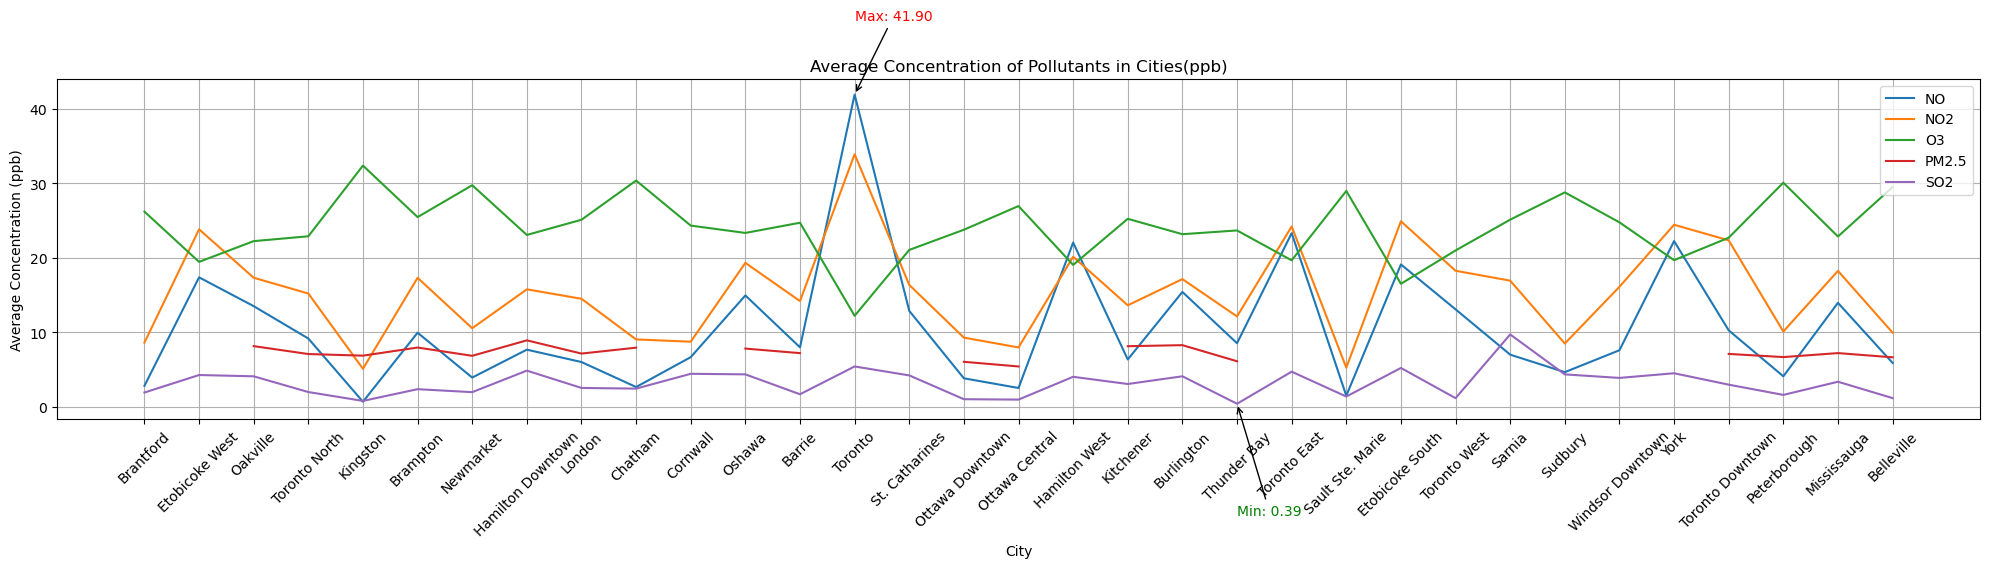

In [11]:
# City-Based analysis visualisation for pollutants NO,NO2,O3,PM2.5,SO2

max_value, min_value = float('-inf'), float('inf')
max_point, min_point = None, None

fig, ax = plt.subplots(figsize=(20, 6))
for pollutant in ['NO','NO2','O3','PM2.5','SO2']:
    ax.plot(city_wise_analysis['city'], city_wise_analysis[pollutant], label=pollutant)
    if city_wise_analysis[pollutant].max() > max_value:
        max_value = city_wise_analysis[pollutant].max()
        max_point = (city_wise_analysis['city'][city_wise_analysis[pollutant].idxmax()], max_value)
    if city_wise_analysis[pollutant].min() < min_value:
        min_value = city_wise_analysis[pollutant].min()
        min_point = (city_wise_analysis['city'][city_wise_analysis[pollutant].idxmin()], min_value)

# Annotate global max
ax.annotate(
    f'Max: {max_value:.2f}',
    xy=(max_point[0], max_point[1]),
    xytext=(max_point[0], max_point[1] + 10),
    arrowprops={'facecolor': 'red', 'arrowstyle': '->'},
    color='red'
)

# Annotate global min
ax.annotate(
    f'Min: {min_value:.2f}',
    xy=(min_point[0], min_point[1]),
    xytext=(min_point[0], min_point[1] - 15),
    arrowprops={'facecolor': 'green', 'arrowstyle': '->'},
    color='green'
)

ax.set_title('Average Concentration of Pollutants in Cities(ppb)')
ax.set_xlabel('City')
ax.set_ylabel('Average Concentration (ppb)')
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper right')
ax.grid(True)

plt.tight_layout()
plt.show()



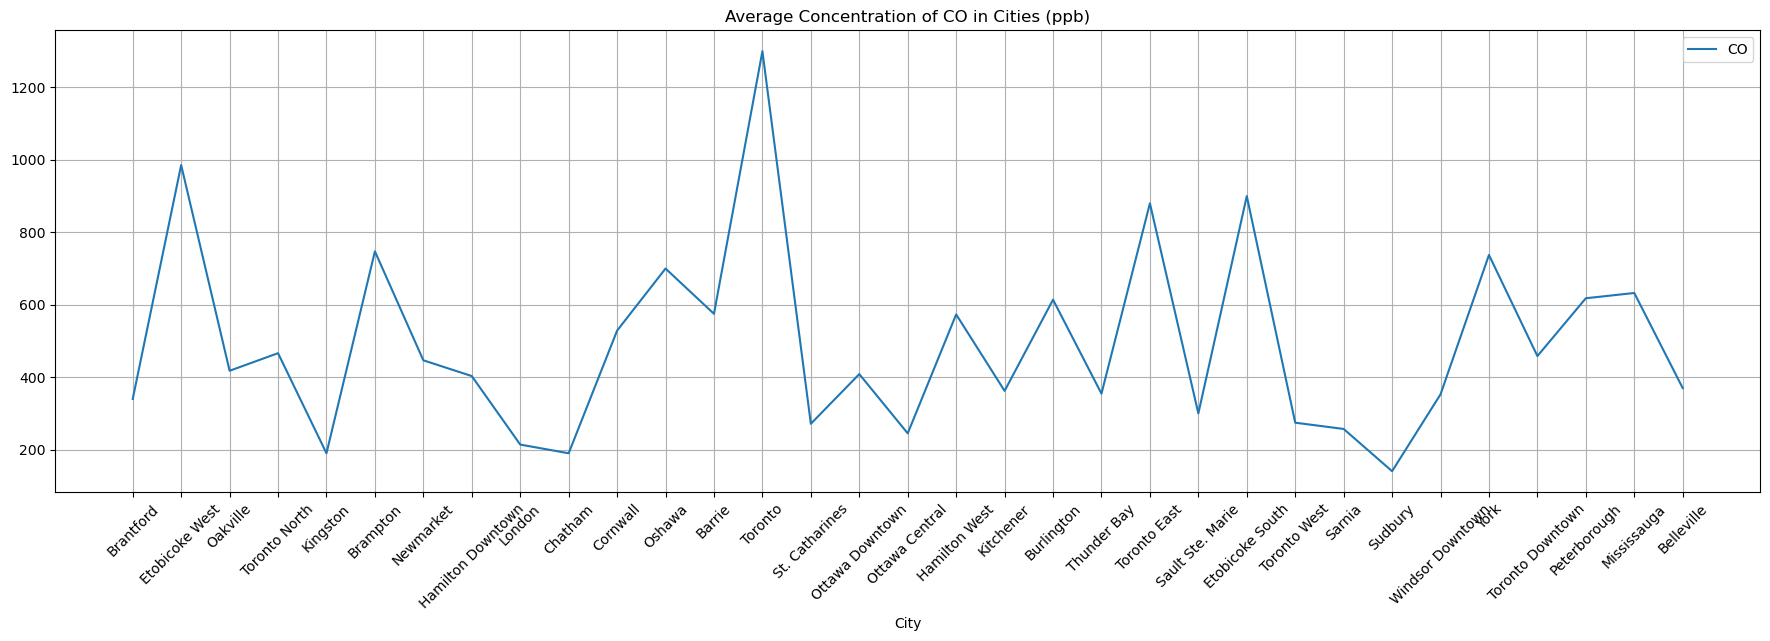

In [12]:
# City-Based analysis visualisation for pollutant CO
figure = plt.subplots(figsize=(22, 6))
plt.plot(city_wise_analysis['city'], city_wise_analysis['CO'], label='CO')
plt.title('Average Concentration of CO in Cities (ppb)')
plt.xlabel('City')
plt.tick_params(axis='x', rotation=45)
plt.legend(loc='upper right')
plt.grid(True)

### Toronto seems to be most populated compared to other cities in Canada. Population might be one of the reasons

In [84]:
# Loading the SQL query in Python and converting dataset into a DataFrame

cursor.execute("""SELECT no2.mean no2_mean, o3.mean o3_mean, pm.mean pm25_mean, co.mean*1000 co_mean,so2.mean so2_mean
FROM PortfolioProjects..no2_data no2
JOIN PortfolioProjects..o3_data o3 ON o3.[year] = no2.[year] AND o3.[Station Number] = no2.[station number]
JOIN PortfolioProjects..PM25_data pm ON pm.[year] = no2.[year] AND pm.[Station Number] = no2.[station number]
JOIN PortfolioProjects..co_data co ON co.[year] = no2.[year] AND co.[Station Number] = no2.[station number]
JOIN PortfolioProjects..SO2_data so2 ON so2.[year] = no2.[year] AND so2.[Station Number] = no2.[station number]""" )

query15 = cursor.fetchall()
corr_analysis= pd.DataFrame.from_records(query15, columns = ['NO2_Mean','O3_Mean','PM25_Mean','CO_Mean','SO2_Mean'])


           NO2_Mean   O3_Mean  PM25_Mean   CO_Mean  SO2_Mean
NO2_Mean   1.000000 -0.701763   0.540177  0.394649  0.432254
O3_Mean   -0.701763  1.000000  -0.209801 -0.265473 -0.105397
PM25_Mean  0.540177 -0.209801   1.000000  0.206461  0.674741
CO_Mean    0.394649 -0.265473   0.206461  1.000000  0.192038
SO2_Mean   0.432254 -0.105397   0.674741  0.192038  1.000000


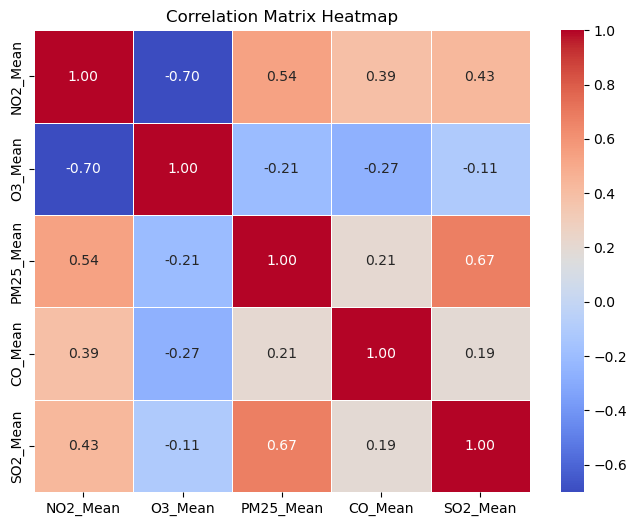

In [86]:
# Understanding the correlation between all the pollutants

corr_matrix = corr_analysis.corr()
print (corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Strong negative correlation between NO2 and O3. Moderate positive correlation for NO2 & PM2.5 and SO2 and PM2.5 

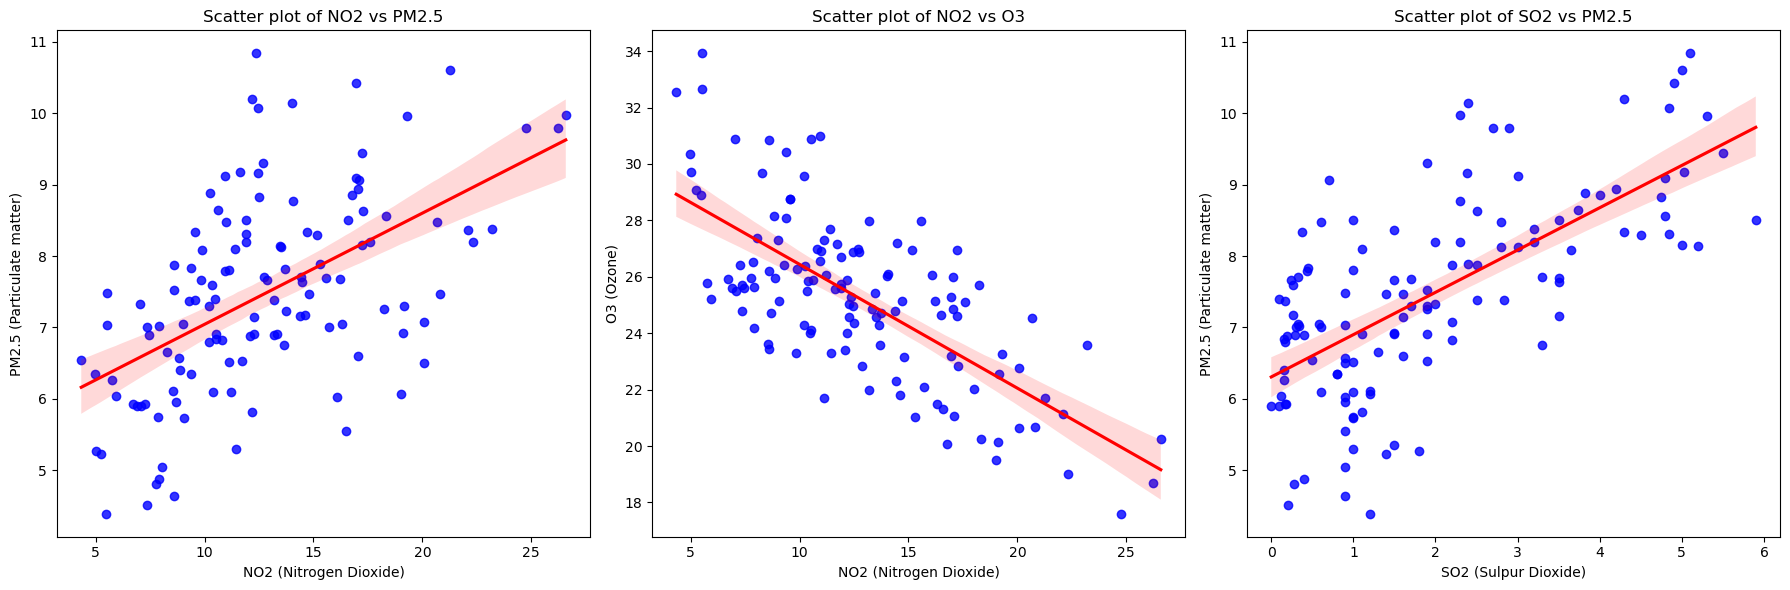

In [92]:
# Visually inspecting the correlations
fig,axs = plt.subplots(1,3,figsize=(18,6))
sns.regplot(x=corr_analysis['NO2_Mean'], y=corr_analysis['PM25_Mean'], ax=axs[0],scatter_kws={"color": "blue"}, line_kws={"color": "red"})
axs[0].set_xlabel('NO2 (Nitrogen Dioxide)')
axs[0].set_ylabel('PM2.5 (Particulate matter)')
axs[0].set_title('Scatter plot of NO2 vs PM2.5')

sns.regplot(x=corr_analysis['NO2_Mean'], y=corr_analysis['O3_Mean'], ax=axs[1],scatter_kws={"color": "blue"}, line_kws={"color": "red"})
axs[1].set_xlabel('NO2 (Nitrogen Dioxide)')
axs[1].set_ylabel('O3 (Ozone)')
axs[1].set_title('Scatter plot of NO2 vs O3')

sns.regplot(x=corr_analysis['SO2_Mean'], y=corr_analysis['PM25_Mean'], ax=axs[2],scatter_kws={"color": "blue"}, line_kws={"color": "red"})
axs[2].set_xlabel('SO2 (Sulpur Dioxide)')
axs[2].set_ylabel('PM2.5 (Particulate matter)')
axs[2].set_title('Scatter plot of SO2 vs PM2.5')

plt.tight_layout()
plt.show()

### O3 and NO2 clearly shows a clean scatter with strong negative trend. Taking the results ahead for linear regression for these pollutant correlation

In [93]:
# Backward filling the NaN values to go ahead with prediction
corr_analysis['O3_Mean'] = (corr_analysis['O3_Mean']).bfill()
corr_analysis['NO2_Mean'] = (corr_analysis['NO2_Mean']).bfill()
corr_analysis['CO_Mean'] = (corr_analysis['CO_Mean']).bfill()
corr_analysis['PM25_Mean'] = (corr_analysis['PM25_Mean']).bfill()
corr_analysis['SO2_Mean'] = (corr_analysis['SO2_Mean']).bfill()

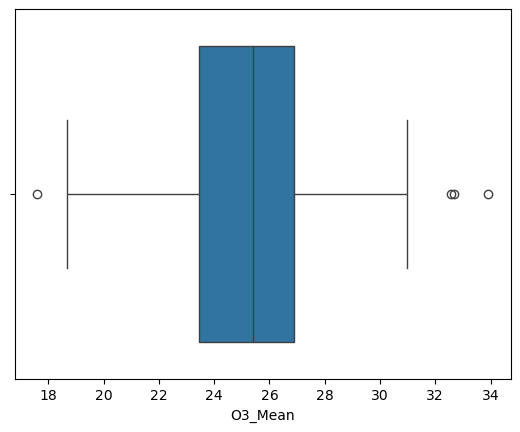

In [136]:
# Checking for outliers in the data for different  pollutants
sns.boxplot(x=corr_analysis['O3_Mean'])
plt.show()

In [116]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for CO and O3
df_cleaned = remove_outliers_iqr(corr_analysis, 'CO_Mean')
df_cleaned = remove_outliers_iqr(df_cleaned, 'O3_Mean')

R-squared: 0.38
Mean Squared Error: 4.88


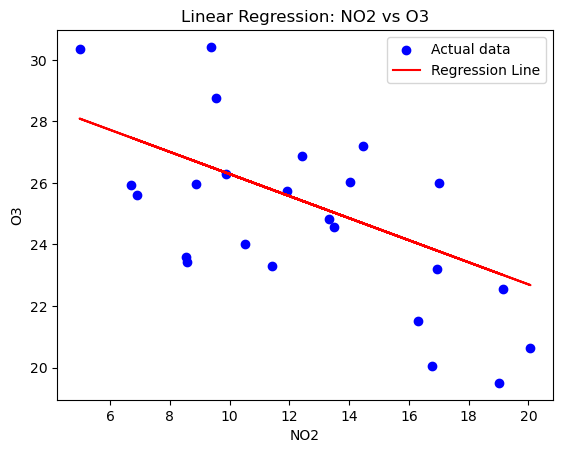

In [133]:
# Linear Regression analysis for O3 prediction using NO2 as the Independent Variable

#  Features (Independent Variable)
X = df_cleaned[['NO2_Mean']]
# Target (Dependent Variable)
y = df_cleaned[['O3_Mean']]

#scaler = StandardScaler()
#y_scaled = scaler.fit_transform(corr_analysis[['O3_Mean']])

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression Model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Using trained model to predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R-squared and Mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Visualising the results
# Plotting the actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('NO2')
plt.ylabel('O3')
plt.title('Linear Regression: NO2 vs O3')
plt.legend()
plt.show()

### A simple linear regression model was applied to predict O₃ levels based on NO₂ concentrations.
### The r-square value is low, indicating that NO2 alone does not explain much vaiance in O3 levels. Plus in the plot the blue points appear fairly dispersed around the regression line, suggesting that while there is a trend, there may also be a lot of variance in the data. The strength of the correlation might not be very strong.
### Tried polynomial regression also, but with no better results.

In [170]:
# Loading the SQL query in Python and converting dataset into a DataFrame

cursor.execute("""WITH cte ([Year],SN,City,
		  CO_limit,NO2_limit,O3_limit,SO2_limit)
AS (
SELECT  co.[year] [Year],co.[station number] SN,co.city City, co.[No# of Times Above 1-Hour Criterion] CO_limit,
		no2.[No# of Times Above 1-Hour Criterion] NO2_limit, o3.[No# of Times Above 1-Hour Criterion] O3_limit, so2.[No# of Times Above 1-Hour Criterion] SO2_limit	
FROM PortfolioProjects..co_data co
LEFT JOIN PortfolioProjects..no_data no_ ON co.[year] = no_.[year] AND co.city = no_.city
LEFT JOIN PortfolioProjects..no2_data no2 ON co.[year] = no2.[year] AND co.city = no2.city
LEFT JOIN PortfolioProjects..o3_data o3 ON co.[year] = o3.[year] AND co.city = o3.city
LEFT JOIN PortfolioProjects..PM25_data pm ON co.[year] = pm.[year] AND co.city = pm.city
LEFT JOIN PortfolioProjects..so2_data so2 ON co.[year] = so2.[year] AND co.city = so2.city
)
SELECT [year], SUM(CO_limit) CO_limit_reached, SUM(NO2_limit) NO2_limit_reached, SUM(O3_limit) O3_limit_reached, SUM(SO2_limit) SO2_limit_reached
FROM cte
GROUP BY [year]
ORDER BY [year] """ )

query16 = cursor.fetchall()
exceedance_analysis= pd.DataFrame.from_records(query16, columns = ['year','CO_limit_reached','NO2_limit_reached','O3_limit_reached','SO2_limit_reached'])
exceedance_analysis['year'] = exceedance_analysis['year'].astype(int)

<Axes: xlabel='year'>

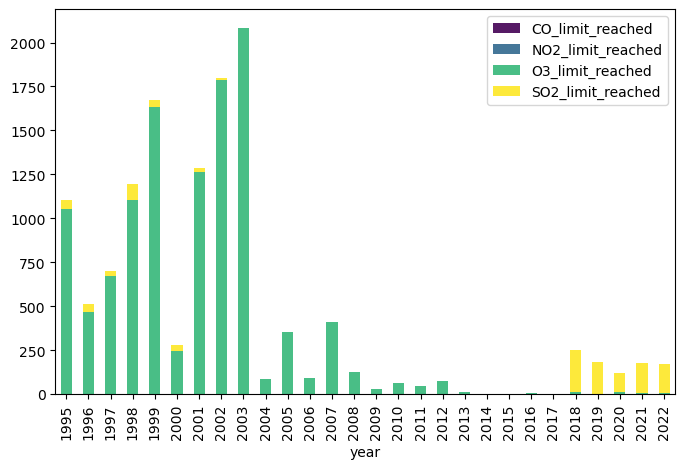

In [171]:
# Visaulising No of times CO,NO2,O3,SO2 concentration exceeded the threshold per year
exceedance_analysis.set_index('year', inplace=True)

# Plot stacked bar chart
exceedance_analysis.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis', alpha=0.9)

### The plot shows a decreasing trend of exceedance level reached for SO2 and increasing for O3 in the years. Although CO and NO2 never seem to reach the threshold level

In [27]:
# Loading the SQL query in Python and converting dataset into a DataFrame

cursor.execute("""WITH cte ([Year],SN,City,
		  CO_limit,NO2_limit,O3_limit,SO2_limit)
AS (
SELECT  co.[year] [Year],co.[station number] SN,co.city City, co.[No# of Times Above 1-Hour Criterion] CO_limit,
		no2.[No# of Times Above 1-Hour Criterion] NO2_limit, o3.[No# of Times Above 1-Hour Criterion] O3_limit, so2.[No# of Times Above 1-Hour Criterion] SO2_limit	
FROM PortfolioProjects..co_data co
LEFT JOIN PortfolioProjects..no_data no_ ON co.[year] = no_.[year] AND co.city = no_.city
LEFT JOIN PortfolioProjects..no2_data no2 ON co.[year] = no2.[year] AND co.city = no2.city
LEFT JOIN PortfolioProjects..o3_data o3 ON co.[year] = o3.[year] AND co.city = o3.city
LEFT JOIN PortfolioProjects..PM25_data pm ON co.[year] = pm.[year] AND co.city = pm.city
LEFT JOIN PortfolioProjects..so2_data so2 ON co.[year] = so2.[year] AND co.city = so2.city
)
SELECT city, SUM(CO_limit) CO_limit_reached, SUM(NO2_limit) NO2_limit_reached, SUM(O3_limit) O3_limit_reached, SUM(SO2_limit) SO2_limit_reached
FROM cte
GROUP BY city""" )

query17 = cursor.fetchall()
exceedanceCity_analysis= pd.DataFrame.from_records(query17, columns = ['city','CO_limit_reached','NO2_limit_reached','O3_limit_reached','SO2_limit_reached'])



<Axes: xlabel='city'>

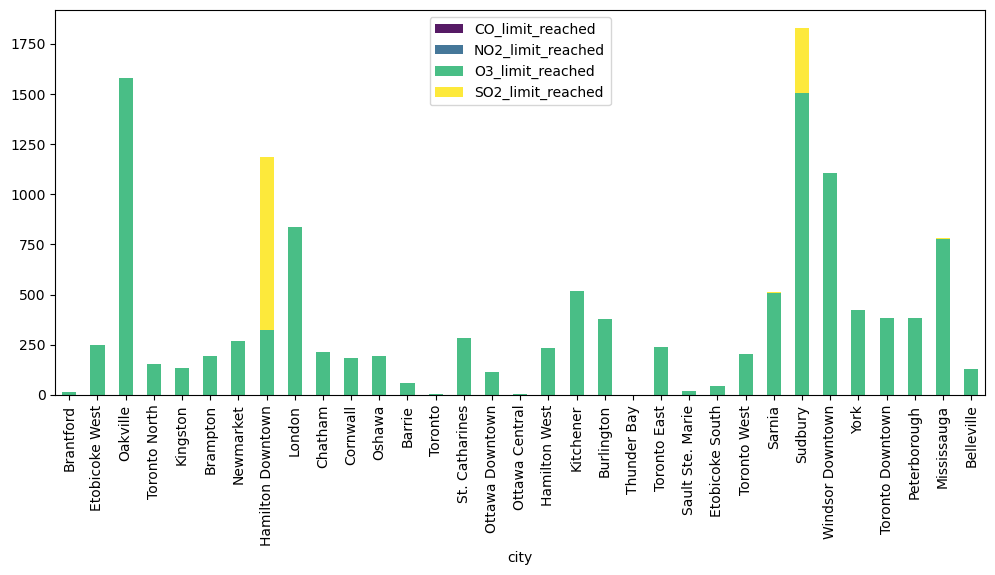

In [28]:
# Visaulising No of times CO,NO2,O3,SO2 concentration exceeded the threshold in different cities
exceedanceCity_analysis.set_index('city', inplace=True)

# Plot stacked bar chart
exceedanceCity_analysis.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='viridis', alpha=0.9)
